Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.metrics import (
    silhouette_score, 
    calinski_harabasz_score, 
    davies_bouldin_score
)
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

In [2]:
# Read in the dataset
df = pd.read_csv('final_perfume_data.csv', encoding = 'unicode_escape')
df

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...
...,...,...,...,...,...
2186,Perfect Veil Eau de Parfum,Sarah Horowitz Parfums,"This was created to smell like clean, naked s...","top: lemon, bergamot base: musk, vanilla, san...",https://static.luckyscent.com/images/products/...
2187,Scent Eau de Parfum,Costume National,Scent is Costume Nationals debut fragrance. W...,"amber, jasmine tea, mother of pearl hibiscus ...",https://static.luckyscent.com/images/products/...
2188,Bronze Eau de Parfum,Nanadebary,"Bronze is a naughty little vixen of a scent, ...","bergamot, mandarine, cinnamon, jasmine, iris,...",https://static.luckyscent.com/images/products/...
2189,Monyette Paris Fragrance Oil,Monyette Paris,"This isn't just sexy, it's big night out se...","Tahitian gardenia, French muguet du bois, hin...",https://static.luckyscent.com/images/products/...


In [3]:
# See the column names
df.columns

Index(['Name', 'Brand', 'Description', 'Notes', 'Image URL'], dtype='object')

In [4]:
# Drop unneccessary columns
df = df.drop(['Image URL'], axis = 1)

In [5]:
# Drop missing values and duplicates
df = df.dropna()
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2111 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2111 non-null   object
 1   Brand        2111 non-null   object
 2   Description  2111 non-null   object
 3   Notes        2111 non-null   object
dtypes: object(4)
memory usage: 82.5+ KB


In [7]:
df.shape

(2111, 4)

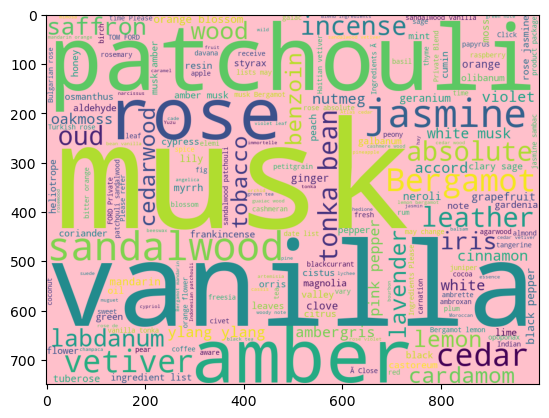

In [8]:
# Wordcloud for Notes
notes = " ".join(df['Notes'].values)
wc = WordCloud(background_color='pink',stopwords=STOPWORDS,height=750,width=1000)
word_cloud = wc.generate(notes)
plt.imshow(word_cloud)
plt.show()

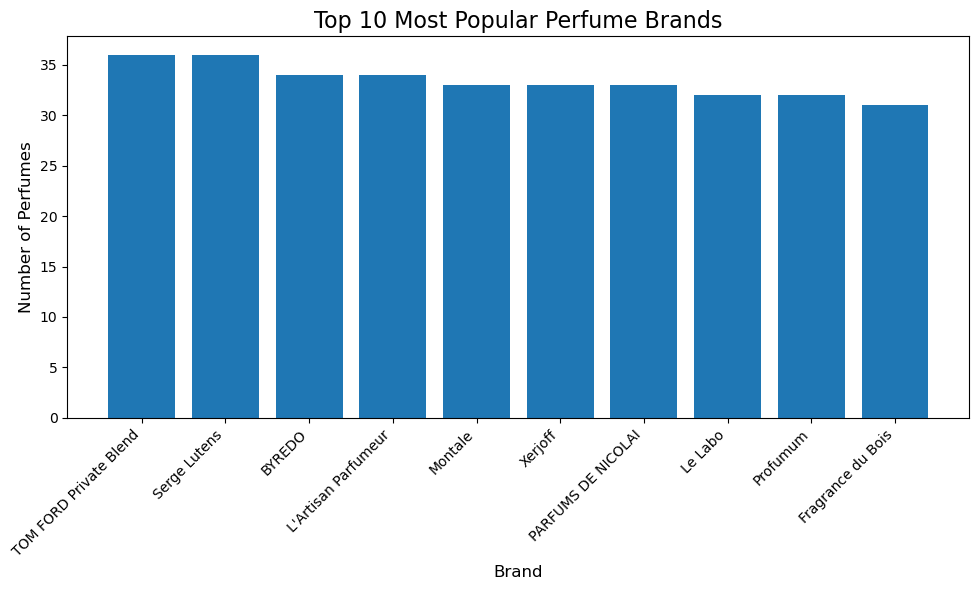

In [9]:
# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts().head(10)  # Top 10 most frequent brands

# Plot a bar chart of the most popular brands
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Top 10 Most Popular Perfume Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Perfumes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

PCA

In [11]:
df['Notes_List'] = df['Notes'].fillna('').apply(lambda x: [note.strip() for note in x.split(',')])

In [12]:
mlb = MultiLabelBinarizer()
notes_encoded = mlb.fit_transform(df['Notes_List'])

In [13]:
notes_encoded_df = pd.DataFrame(notes_encoded, columns=mlb.classes_, index=df.index)

In [14]:
print(notes_encoded_df.head())

      & Ambergris.  100% pure organic vintage Oud  100% pure oud  \
0  0             0                              0              0   
1  0             0                              0              0   
2  0             0                              0              0   
3  0             0                              0              0   
4  0             0                              0              0   

   11 select (but undisclosed!) notes that evoke vegetable tanned horse leather  \
0                                                  0                              
1                                                  0                              
2                                                  0                              
3                                                  0                              
4                                                  0                              

   7% Natural Ambergris  \
0                     0   
1                     0   
2          

In [15]:
scaler = StandardScaler()
notes_scaled = scaler.fit_transform(notes_encoded_df)

In [16]:
pca = PCA()
notes_pca = pca.fit_transform(notes_scaled)

In [17]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

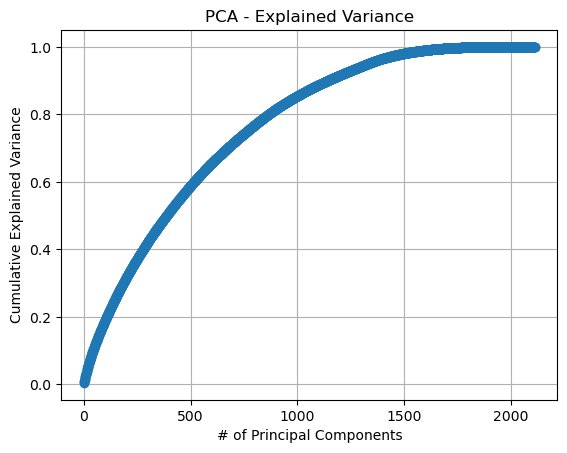

In [25]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

In [26]:
n_components = 5
pca = PCA(n_components=n_components)
notes_reduced = pca.fit_transform(notes_scaled)
print("Shape of Reduced Notes:", notes_reduced.shape)

Shape of Reduced Notes: (2111, 5)


Modeling and Evaluation

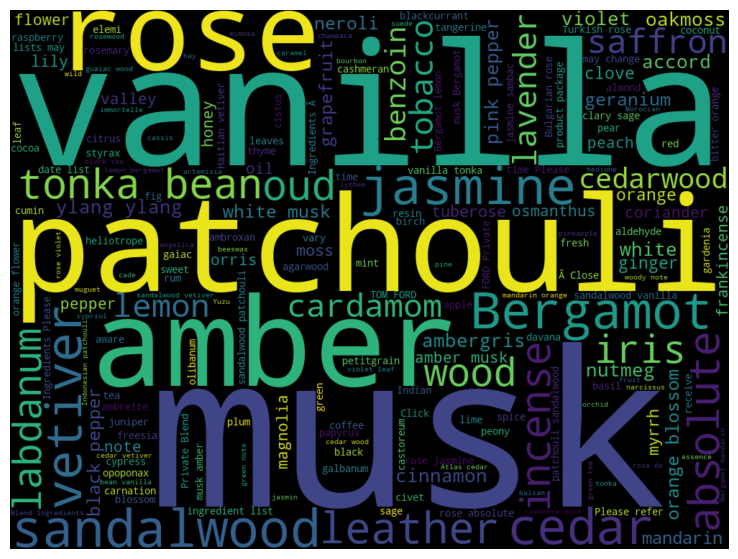

In [28]:
notes = " ".join(df['Notes'].dropna().astype(str).values)  
wc = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    height=750,
    width=1000
)

word_cloud = wc.generate(notes)
plt.figure(figsize=(10, 7))  # Adjust figure size for better visualization
plt.imshow(word_cloud, interpolation='bilinear')  # Better rendering
plt.axis("off")  # Turn off axis for cleaner display
plt.show()

In [29]:
#Evaluation function
def evaluate(X,labels):
    results = {}
    if len(set(labels)) - (1 if -1 in labels else 0) > 1:
        results['Silhouette Score'] = silhouette_score(X, labels)
        results['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
        results['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    return results

In [30]:
# Combine 'Description' and 'Notes' columns for feature extraction

In [31]:
df['Combined_Features'] = df['Description'].fillna('') + ' ' + df['Notes'].fillna('')

In [32]:
df['Combined_Features'].head()

0     Rapa Nui for sugar, Tihota is, quite simply, ...
1     A tribute to the expanse of space extending f...
2     An aromatic ode to the ancient beauty of Japa...
3     Velvet Fantasy is a solar fragrance where cit...
4     There's no way A Lab On Fire could relocate t...
Name: Combined_Features, dtype: object

In [33]:
#Convert combined features text into numerical
vectorizer = CountVectorizer(stop_words='english')
count_matrix = vectorizer.fit_transform(df['Combined_Features'])

scaler = StandardScaler(with_mean=False)
scaled_features = scaler.fit_transform(count_matrix.toarray())

agglo = AgglomerativeClustering(linkage='ward')
df['cluster'] = agglo.fit_predict(scaled_features)

evaluate(scaled_features, df['cluster'])

{'Silhouette Score': 0.42427885102238555,
 'Calinski-Harabasz Index': 4.723206168934486,
 'Davies-Bouldin Index': 0.43897964971553716}

Recommender System

In [35]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [36]:
# Recommendation Function
def recommend_perfumes(perfume_name, num_recommendations=5):
    try:
        # Get the get the given perfume name's index
        # Filters the DataFrame to find rows where the name column contains the function input
        # Uses case=False to make the search case-insensitive.
        # Get the first match by using .index[0] 
        perfume_idx = df[df['Name'].str.contains(perfume_name, case=False, na=False)].index[0]
        
    except IndexError:
        # Index error raised if theres no name matches found
        return f"No perfume found with the name '{perfume_name}'."
    
    # Accesses the row in the cosine similarity matrix corresponding to the input perfume (perfume_idx).
    # list(enumerate(...)) pairs each score with its index
    #  Structure of sim_scores:
    #      Each element is a tuple:
    #         The first value is the index of the resulting perfume.
    #         The second value is the similarity score with the perfume entered
    sim_scores = list(enumerate(cosine_sim[perfume_idx]))
    
    # Sorts perfumes based on similarity scores in descending order
    # Ensures the most similar perfumes appear first.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the most similar perfumes
    # Extracts the indices of the top num_recommendations most similar perfumes.
    # sim_scores[1:num_recommendations + 1] skips the first score because it corresponds to the input perfume itself (similarity score = 1.0).
    recommended_indices = [i[0] for i in sim_scores[1:num_recommendations + 1]]
    
    # Uses the indices of the recommended perfumes (recommended_indices) to retrieve their details (Name and Brand) from the DataFrame.
    return df.iloc[recommended_indices][['Name', 'Brand']]

In [44]:
# Test the recommender system
recommendations = recommend_perfumes('Tihota', num_recommendations=5)
print(recommendations)

                                              Name  \
2083                  Vanille Absolu Eau de Parfum   
1481                   Vanilla Flash Eau de Parfum   
2134                   Vanille Tonka Eau de Parfum   
564                              Sucre Noir Parfum   
261   Vaniglia del Madagascar Parfum Concentration   

                                 Brand  
2083                           Montale  
1481                        Tauerville  
2134                PARFUMS DE NICOLAI  
564                       Arte Profumi  
261   Farmacia SS. Annunziata dal 1561  
